# MNIST Dataset

In [3]:
import numpy as np 
import sklearn
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml(name='mnist_784')

In [8]:
print(len(mnist['data']))
print(type(mnist))

70000
<class 'sklearn.utils.Bunch'>


In [9]:
X, y = mnist['data'], mnist['target']
y = y.astype('float')

In [22]:
X = np.array(X)
X[69999]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 117., 254., 220.,
        89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        13.,  95., 212., 253., 253., 253., 157.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  16.,  95., 209., 253., 253., 253., 245.,
       125.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
y[69999]

6.0

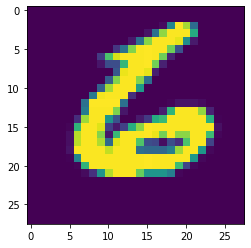

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns

def viz(n):
    plt.imshow(X[n].reshape(28, 28))
    return
viz(69999)

In [28]:
# find 4s
np.where(y==4)

(array([    2,     9,    20, ..., 69977, 69987, 69997], dtype=int64),)

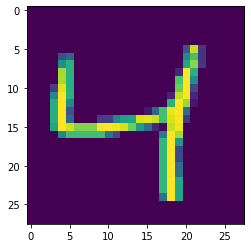

In [30]:
viz(2)

## Train / Test Sets

In [36]:
from sklearn.model_selection import train_test_split
# shuffle to make sure trainign set is randomized, usually done with the exception of time series data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

## Training a Binary Classifier

Convert this problem from 10 options (0-9) to binary, simplifies the approach

Start with a binary problem for if the number is 0 or not

In [37]:
y_train_0 = y_train == 0
y_test_0 = y_test == 0

## SGDDClassifier

In [39]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

SGDClassifier(random_state=0)

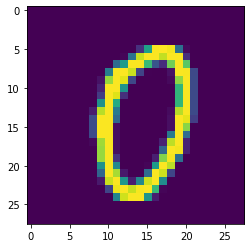

In [40]:
viz(1000)

In [42]:
# correct prediction
clf.predict(X[1000].reshape(1, -1))

array([ True])

## Performance Measures -  Measuring Accuracy using CV

### K-Fold CV

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([0.98708952, 0.9869288 , 0.98907104])

## Confusion Matrix

In [49]:
from sklearn.model_selection import cross_val_predict

In [50]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

In [51]:
from sklearn.metrics import confusion_matrix

In [56]:
import pandas as pd
pd.DataFrame(
    confusion_matrix(y_train_0, y_train_pred),
    columns=pd.MultiIndex.from_product([['Prediction'], ['Negative', 'Positive']]),
    index = pd.MultiIndex.from_product([['Actual'], ['Negative', 'Positive']])
    )

Prediction         
                  Negative Positive
Actual Negative      50194      290
       Positive        399     5117

## Precision 

Measures the accuracy of positive scores. Right side of confusion matrix

precision = true positives / (true positives + false positives)

In [57]:
from sklearn.metrics import precision_score, recall_score

In [58]:
precision_score(y_train_0, y_train_pred)

0.9463658220824857

## Recall 

Also called sensitivity or true positive rate, ratio of positive instances that are correct. Botom row of confusion matrix. Negatively dependent on precision

recall = true positives / (true positives + false negatives)

In [59]:
recall_score(y_train_0, y_train_pred)

0.9276649746192893

## F1 Score

Harmonic mean of precision and recall, gives more weight to lower values

F1 = 2 / (1/precision + 1/recall) 

In [60]:
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.9369220910006407

## Precision / Recall Tradeoff

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 9.000e+00, 1.000e+01,
        1.300e+01, 2.000e+01, 2.100e+01, 3.200e+01, 3.600e+01, 4.900e+01,
        5.400e+01, 5.600e+01, 8.100e+01, 9.600e+01, 1.300e+02, 1.310e+02,
        1.960e+02, 2.150e+02, 2.440e+02, 2.730e+02, 3.020e+02, 3.700e+02,
        4.840e+02, 5.400e+02, 6.390e+02, 6.720e+02, 8.320e+02, 9.360e+02,
        1.061e+03, 1.221e+03, 1.321e+03, 1.474e+03, 1.710e+03, 1.872e+03,
        2.123e+03, 2.244e+03, 2.418e+03, 2.631e+03, 2.692e+03, 2.688e+03,
        2.751e+03, 2.592e+03, 2.526e+03, 2.290e+03, 2.118e+03, 1.833e+03,
        1.628e+03, 1.308e+03, 1.089e+03, 8.190e+02, 6.330e+02, 4.810e+02,
        3.210e+02, 2.740e+02, 2.560e+02, 2.350e+02, 2.860e+02, 3.310e+02,
        4.370e+02, 4.750e+02, 4.990e+0

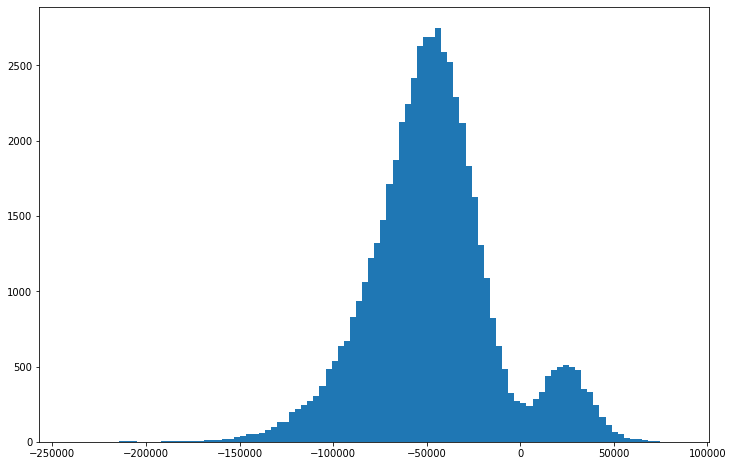

In [61]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')
plt.figure(figsize=(12,8))
plt.hist(y_scores, bins=100)

Plot of decision function scores

Right side is Y = 0, while left side is Y != 0

Small amount of overlap between ditributions around 0

Can compute precision and recall for all possible thresholds using the ```precision_recall_curve``` function

In [63]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

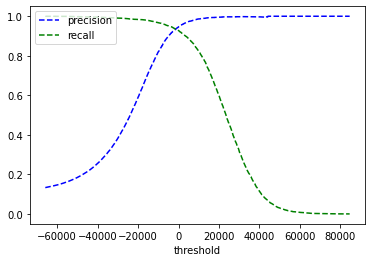

In [64]:
def plot_precision_v_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('threshold')
    plt.legend(loc='upper left')
    
plot_precision_v_recall(precisions, recalls, thresholds)

## Setting High Precisions

Suppose we want precision to be greater than 90%

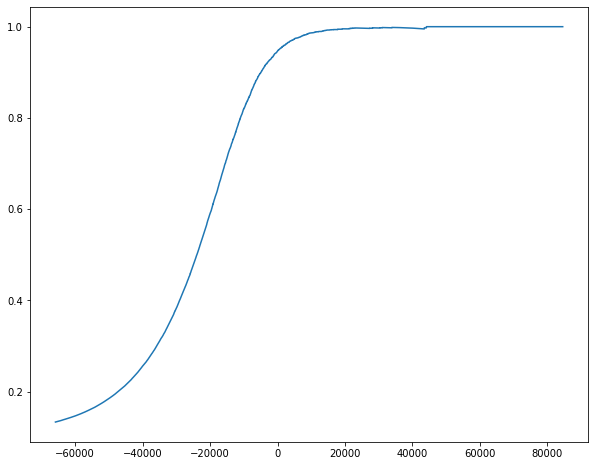

In [65]:
plt.figure(figsize=(10,8))
plt.plot(thresholds, precisions[1:])

In [66]:
idx = len(precisions[precisions < 0.9])
thresholds[idx]

-4909.616739766118

In [67]:
y_train_pred_90 = (y_scores > thresholds[idx])
precision_score(y_train_0, y_train_pred_90)

0.9002575107296137

In [68]:
recall_score(y_train_0, y_train_pred_90)

0.9506889050036258